<a href="https://colab.research.google.com/github/pccalegari/ajuste/blob/master/curva_polar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curva de polarização



1. Aproximação dos parâmetros da curva de polarização   

    Para ajustar os dados experimentais a uma função linear, precisamos obter os parâmetros $a_0$ e $a_1$ de  $$f(x,{\bf a}) = a_0 - a_1x.$$ 
    
    Para o ajuste da curva de polarização por meio da função não linear é necessário obter os parâmetros ${\bf a}$ da função,
$$ f(x,{\bf a})= a_0 - a_1x - a_2\ln\left(\frac{x}{a_3} + 1\right) - a_4\exp(a_5x).$$

Nos dois casos, os parâmetros são obtidos por meio do método dos mínimos quadrados, no qual temos como objetivo minimizar a função,

$$  r({\bf a}) = \dfrac{1}{2}\sum_{i=1}^m r_i({\bf a})^2,$$

sendo o resíduo $r_i({\bf a}) = f(x_i,{\bf a}) - y_i$, com $(x_i,y_i)$ dados e $m$ tamanho dos vetores $x$ e $y$. 

Para ajustar os parâmetros da curva de polarização, escrevemos um programa na linguagem *python* com a utilização das bibliotecas *numpy* e *scipy*. As bibliotecas podem ser importadas da seguinte forma.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import interpolate


A seguir definimos as funções $f(x,{\bf a})$ (linear e não linear) e a função resíduo $r({\bf a})$.

In [ ]:
def fnlinear(t, a, b, c, d, e, f=0.6795, noise=0, n_outliers=0, random_state=0):
    y = f - a*np.log(t/b + 1.0) - c*t - d*np.exp(e*t)
    return y

def flinear(t, a, b):
    y = a - b*t 
    return y

def rnlinear(x, t, y):
    #x[5] = 0.6795
    return 0.6795 - x[0]*np.log(t/x[1] + 1.0) - x[2]*t - x[3]*np.exp(x[4]*t) - y

def rlinear(x, t, y):
    return x[0] - x[1]*t - y


Insira os dados para o ajuste da curva de polarização.

> Por exemplo: i = np.array([x_0, x_1, ... , x_n-1])



In [ ]:
i=np.array([0.0, 4.75*10**(-4), 8.27*10**(-4), 1.69*10**(-3), 2.5*10**(-3), 3.01*10**(-3), 3.19*10**(-3), 3.86*10**(-3)])
n = len(i)

Agora insira v = [y_0, y_1, ..., y_n-1]

In [ ]:
v=np.array([0.6795, 0.4862, 0.423, 0.33975, 0.25075, 0.2062, 0.1629, 0.07715])

Vamos iniciar com o ajuste linear:

In [ ]:
i_min = i[0]
i_max = i[n-1]

x0 = np.array([0.1, 0.1])

res_lin = optimize.least_squares(rlinear, x0, args=(i, v))
    
print("Parâmetros do ajuste Linear")
#print(res_lin)
print("a = ", *res_lin.x)
    

Parâmetros do ajuste Linear
a =  0.5913147056158731 135.35671545634105


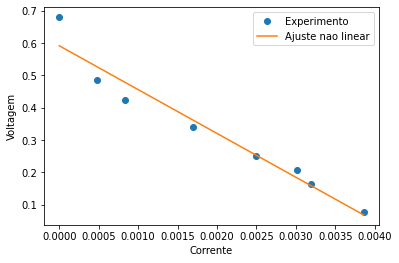

In [ ]:
i_test = np.linspace(i_min, i_max, 100)
 
y_lin = flinear(i_test, *res_lin.x)
  
plt.figure(1)
plt.plot(i, v, 'o', label='Experimento')
plt.plot(i_test, y_lin, label='Ajuste nao linear')
plt.xlabel("Corrente")
plt.ylabel("Voltagem")
plt.legend()
plt.show()

Agora o ajuste não linear: (É necessário um bom chute inicial, ou seja uma boa escolha para x0)

In [ ]:
i_min = i[0]
i_max = i[n-1]
    
x0 = np.array([0.0, 0.05, 100, 0.0, 500.0])

res_lsq = optimize.least_squares(rnlinear, x0, args=(i, v))

print("Parâmetros do ajuste Não linear")
#print(res_lsq)
print("a = ", *res_lsq.x)



Parâmetros do ajuste Não linear
a =  0.06394045076677758 3.672475707239177e-05 50.556501893906564 0.0026280353397144718 968.7784277961354


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


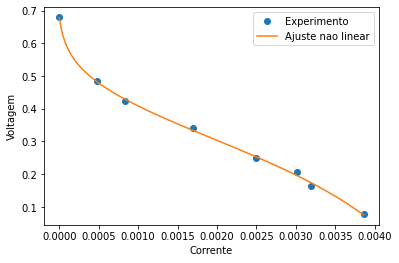

In [ ]:
 i_test = np.linspace(i_min, i_max, 100)
 
 y_lsq = fnlinear(i_test, *res_lsq.x)
  
 plt.figure(2)
 plt.plot(i, v, 'o', label='Experimento')
 plt.plot(i_test, y_lsq, label='Ajuste nao linear')
 plt.xlabel("Corrente")
 plt.ylabel("Voltagem")
 plt.legend()
 plt.show()